### Topic Ideas
* Interviews
* Rejections
* Prefrosh (flair)
* [GUIDE]

# Scraping Reddit Comments

In [2]:
import praw
import pandas as pd
import configparser
import numpy as np
from praw.models import MoreComments

In [3]:
!pwd

/home/chadharness/w210/webscraping


## Get Configuration Parameters

In [4]:
config = configparser.ConfigParser()
config.read('../config/reddit.config')

['../config/reddit.config']

## Instantiate PRAW Object

In [5]:
reddit = praw.Reddit(client_id=config['REDDIT_CONFIG']['client_id'],
                     client_secret=config['REDDIT_CONFIG']['client_secret'],
                     password=config['REDDIT_CONFIG']['password'],
                     user_agent=config['REDDIT_CONFIG']['user_agent'],
                     username=config['REDDIT_CONFIG']['username'])

In [7]:
for submission in reddit.subreddit('ApplyingToCollege').hot(limit=10):
    print(submission.title)

Tips and advice from A2C Fall 2016 seniors
Admissions Journey Timeline starting Junior Summer
To write a better essay, throw away EVERYTHING you learned in AP English
Will doing lots of drugs help me stand out?
Is it just me or has college admissions gotten way harder in the past few years?
If I were to go through the college application process again, I would tell myself
Best schools with merit aid for a 30 ACT?
prestige vs practicality
Professor called me deceptive?
How overcrowded are the UCs


### Take a Peek at ApplyingToCollege Subreddit

In [8]:
subreddit = reddit.subreddit('ApplyingToCollege')

In [9]:
print(subreddit.display_name)  # Output: redditdev
print(subreddit.title)         # Output: reddit Development

ApplyingToCollege
ApplyingToCollege


## Grab Some Posts

In [12]:
for submission in subreddit.top(limit=5):
    print(submission.title)  # Output: the submission's title
    print(submission.score)  # Output: the submission's score
    print(submission.id)     # Output: the submission's ID
    print(submission.url)    # Output: the URL the submission points to

My theory: Stanford doesn't exist. Let me explain why.
10494
62bgi8
https://www.reddit.com/r/ApplyingToCollege/comments/62bgi8/my_theory_stanford_doesnt_exist_let_me_explain_why/
sigh
2327
87wi0k
https://www.reddit.com/r/ApplyingToCollege/comments/87wi0k/sigh/
UCLA rejection with a 1600
2315
850jbj
https://www.reddit.com/r/ApplyingToCollege/comments/850jbj/ucla_rejection_with_a_1600/
Can't Go to My Dream School Because a Man Lied to Me
1920
65qmqo
https://www.reddit.com/r/ApplyingToCollege/comments/65qmqo/cant_go_to_my_dream_school_because_a_man_lied_to/
5 months ago, I poured my heart into my Stanford application. Today, I found out I'll be going there next year.
1607
854mqc
https://www.reddit.com/r/ApplyingToCollege/comments/854mqc/5_months_ago_i_poured_my_heart_into_my_stanford/


## View Comments

In [14]:
submission = reddit.submission(id='87wi0k')
line = 0
for top_level_comment in submission.comments:
    line += 1
    print(top_level_comment.body)
    if line == 5:
        break

>216 points (100% upvoted)
I gave up as soon as I saw my first semester GPA lol
lmao L after L
current top post: 

>sigh
s**L**igh


## Selected Thread Comments

In [42]:
submission_url = 'https://www.reddit.com/r/ApplyingToCollege/comments/8qkr9u/to_write_a_better_essay_throw_away_everything_you/'

In [43]:
submission = reddit.submission(url=submission_url)

In [16]:
x = 0

from collections import defaultdict

comments_dict = defaultdict()
for top_level_comment in submission.comments:
    print("=============NEW COMMMENT=============")
    print('Comment ID:',top_level_comment)
    print('Comment Body:', top_level_comment.body)
    print('Comment Author:', top_level_comment.author)
    print('Comment Author Flair CSS:',top_level_comment.author_flair_css_class)
    print('Comment Author Flair Text',top_level_comment.author_flair_text)
    print('Comment Body Controversaility:', top_level_comment.controversiality)
    print('Comment Created:', top_level_comment.created)
    print('Comment Created UTC:', top_level_comment.created_utc)
    print('Comment Depth', top_level_comment.depth)
    print('Comment Downvotes', top_level_comment.downs)
    print('Comment UpVotes', top_level_comment.ups)
    print('Comment Score', top_level_comment.score)
    print('Comment Submission', top_level_comment.submission)
    print('Comment User Reports', top_level_comment.user_reports)
    print('Comment Subreddit', top_level_comment.subreddit)
    print('Comment Post', top_level_comment.submission)
    print('Submission Title: ', submission.title)
    print('Submission Score: ', submission.score)
    
    comments_dict['Comment ID'] = top_level_comment
    comments_dict['Comment Body'] = top_level_comment
    break

=============NEW COMMMENT=============
Comment ID: e0jxq9j
Comment Body: joke's on you, I didn't learn anything in AP English
Comment Author: echoacm
Comment Author Flair CSS: 
Comment Author Flair Text Prefrosh
Comment Body Controversaility: 0
Comment Created: 1528853813.0
Comment Created UTC: 1528825013.0
Comment Depth 0
Comment Downvotes 0
Comment UpVotes 290
Comment Score 290
Comment Submission 8qkr9u
Comment User Reports []
Comment Subreddit ApplyingToCollege
Comment Post 8qkr9u
Submission Title:  To write a better essay, throw away EVERYTHING you learned in AP English
Submission Score:  410


## Write to CSV

In [17]:
submission.comments.replace_more(limit=1)
with open('test.csv', 'w') as f:
    for top_level_comment in submission.comments:
        f.write(top_level_comment.name)
        f.write(',')        
        comment_parsed = top_level_comment.body.replace('\n',' ').replace('\t',' ').replace(',',' ')
        if top_level_comment.author is None:
            f.write('NO AUTHOR')
        else:
            f.write(top_level_comment.author.name)
        f.write(',')
        if top_level_comment.author_flair_text is None:
            f.write('NO FLAIR')
        else:
            f.write(top_level_comment.author_flair_text)
        f.write(',')
        f.write(str(top_level_comment.score))
        f.write(',')
        f.write(comment_parsed)
        f.write('\n')

# Read Results

In [18]:
df = pd.read_csv('test.csv', index_col=0, names=['ID','User','Flair','Score','Body'])
df.head()

,User,Flair,Score,Body
ID,,,,
t1_e0jxq9j,echoacm,Prefrosh,290,joke's on you I didn't learn anything in AP E...
t1_e0k9qsr,CornHellUniversity,NO FLAIR,48,All I remember from AP Eng is Ethos Pathos L...
t1_e0jy6sx,OwenLeaf,HS Junior,94,I feel bad for you guys if this is what your A...
t1_e0k27ct,holdenthe,NO FLAIR,23,i kinda realized this when i tried to write my...
t1_e0k5gtx,pachacuti092,HS Senior,18,Jokes on u cuz I didn’t even take ap English


In [19]:
df.shape

(16, 4)

In [20]:
df.sort_values('Score')['Body'][0]

'... crap and my life is too boring to draw a picture with welp'

In [44]:
submission = reddit.submission(url=submission_url)
submission.comments.replace_more(limit=1)
comment_queue = submission.comments[:]  # Seed with top-level
comment_number = 1
with open('test.csv', 'w') as f:
    while comment_queue:
        comment = comment_queue.pop(0)
        f.write(comment.name)
        f.write(',')
        f.write(str(comment.depth))
        f.write(',')
        comment_parsed = comment.body.replace('\n',' ').replace('\t',' ').replace(',',' ')
        if comment.author is None:
            f.write('NO AUTHOR')
        else:
            f.write(comment.author.name)
        f.write(',')
        if comment.author_flair_text is None:
            f.write('NO FLAIR')
        else:
            f.write(comment.author_flair_text)
        f.write(',')
        f.write(str(comment.score))
        f.write(',')
        f.write(comment_parsed)
        f.write('\n')
        #print('=============Comment Number {}============='.format(comment_number))
        #print('=========Comment Depth: {}======='.format(comment.depth))
        # print(comment.body)
        comment_queue.extend(comment.replies)
        comment_number += 1

In [22]:
df = pd.read_csv('test.csv', index_col=0, names=['ID','Depth','User','Flair','Score','Body'])

In [31]:
df.shape

(34, 5)

In [23]:
df.head()

,Depth,User,Flair,Score,Body
ID,,,,,
t1_e0jxq9j,0,echoacm,Prefrosh,293,joke's on you I didn't learn anything in AP E...
t1_e0k9qsr,0,CornHellUniversity,NO FLAIR,45,All I remember from AP Eng is Ethos Pathos L...
t1_e0jy6sx,0,OwenLeaf,HS Junior,95,I feel bad for you guys if this is what your A...
t1_e0k27ct,0,holdenthe,NO FLAIR,23,i kinda realized this when i tried to write my...
t1_e0k5gtx,0,pachacuti092,HS Senior,19,Jokes on u cuz I didn’t even take ap English


In [30]:
df.loc[df['Depth'] == 1].sort_values('Score').head()

,Depth,User,Flair,Score,Body
ID,,,,,
t1_e0lc77o,1,N4_IS_PLS,Senior,1,Read write revise. Read at least 30 minute...
t1_e0lasgb,1,305rose,Prefrosh,2,record yourself speaking your essay and then c...
t1_e0kzfsa,1,ScholarGrade,MBA,3,I mean ee cummings went to Harvard without it...
t1_e0kz9dh,1,ScholarGrade,MBA,3,Wow you had a great teacher then. I've heard ...
t1_e0kmdl6,1,ScholarGrade,MBA,4,Many AOs will go back periodically throughout ...


## Plot Depth/Score

In [32]:
df.plot(x='Depth', y='Score', kind='scatter', figsize=(15,10))

### Groupby Flair

In [46]:
df['First Flair'] = df.apply(lambda x: x['Flair'].split(' / ')[0], axis=1)
#df['Second Flair'] = df.apply(lambda x: x['Flair'].split(' / ')[1], axis=1)

In [47]:
grouped_by_flair = df.groupby('First Flair')

In [48]:
average_score = grouped_by_flair.aggregate(np.average).sort_values('Score')

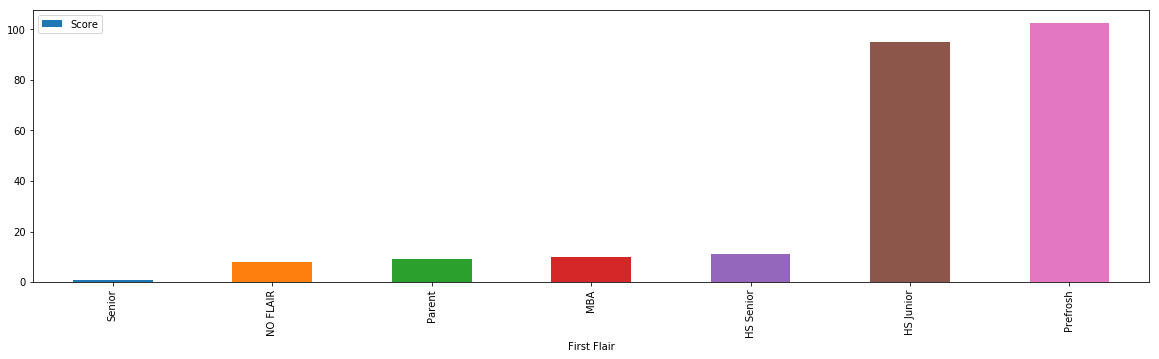

In [53]:
average_score.loc[average_score['Score'] < 1000].plot(y='Score', kind='bar',figsize=(20,5))

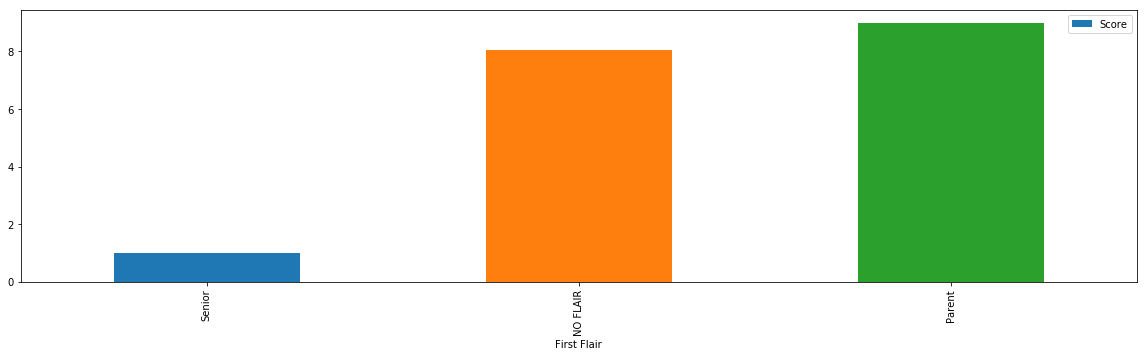

In [41]:
average_score.loc[average_score['Score']< 10].plot(y='Score', kind='bar',figsize=(20,5))